### **AdaBoost Algorithm – Roman Urdu Mein Explanation**

**AdaBoost (Adaptive Boosting)** aik ensemble learning technique hai jo multiple weak classifiers ko mila ke aik strong classifier banata hai. Ye sequentially weak learners ko train karta hai aur unki performance improve karta hai. 

---

### **Why We Use AdaBoost:**
1. Jab ek single model (jaise decision stump) achi accuracy nahi de raha ho.
2. Jab humein ek **strong classifier** banana ho multiple weak classifiers ko mila ke.
3. Overfitting ka chance kam karne ke liye.
4. Lightweight aur simple models ke saath kaam karte huye performance improve karne ke liye.

---

### **How It Works:**
1. Ek **weak classifier** (jaise decision stump) ko train kiya jata hai.
2. Har data point ko ek **weight** assign hota hai. AdaBoost un points par zyada focus karta hai jo pehle classifier se galat classify hue.
3. Har iteration mein weak classifier ka weight calculate hota hai, jo uski performance ke hisaab se adjust hota hai.
4. Akhir mein sab classifiers ko combine karke ek strong model banta hai.

---

### **Where We Use AdaBoost:**
1. **Binary Classification:** Jaise email spam detection (Spam/Not Spam).
2. **Multi-Class Classification:** Jaise digit recognition (0 se 9 tak).
3. **Medical Diagnostics:** Disease ka prediction karne ke liye.
4. **Image Classification:** Simple image datasets ke liye.

---

### **Benefits of AdaBoost:**
1. **Accuracy Improve Karta Hai:** Weak learners ko mila ke strong classifier banata hai.
2. **Simple Models:** Decision stumps jese simple models use kar ke bhi high accuracy deta hai.
3. **Adaptive:** Galat predictions ko correct karne ke liye zyada focus karta hai.
4. **Versatile:** Binary aur multi-class problems ke liye use ho sakta hai.

---

### **Disadvantages of AdaBoost:**
1. **Outliers Sensitive:** Agar data mein outliers ho, to AdaBoost un par zyada focus kar sakta hai, jo performance ko kharab karega.
2. **Complex Datasets:** Highly non-linear aur noisy datasets ke liye ye effective nahi hota.
3. **Slow Training:** Sequential nature ki wajah se large datasets par slow ho sakta hai.
4. **Overfitting Risk:** Agar weak classifiers bohot complex ho, to overfitting ho sakta hai.

---

### **Example of AdaBoost:**
Imagine karo ke tum ek spam filter design kar rahe ho. Tumhare paas ek dataset hai emails ka, jisme **Spam** aur **Not Spam** classify karna hai. Tumne initially ek weak model banaya jo sirf 60% accuracy deta hai. AdaBoost is weak model ko improve karega by focusing more on misclassified emails aur final ensemble classifier ka output zyada reliable hoga.

### **In Short:**
- **AdaBoost:** Weak models ko mila ke ek strong model banata hai.
- **Use Case:** Jab ek weak classifier kaam nahi kar raha ho.
- **Advantages:** Simple, adaptive, aur high accuracy ke liye.
- **Disadvantages:** Outliers sensitive aur slow training.

In [35]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [36]:
df = pd.DataFrame()

In [37]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [38]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [39]:
df.shape

(10, 3)

<Axes: xlabel='X1', ylabel='X2'>

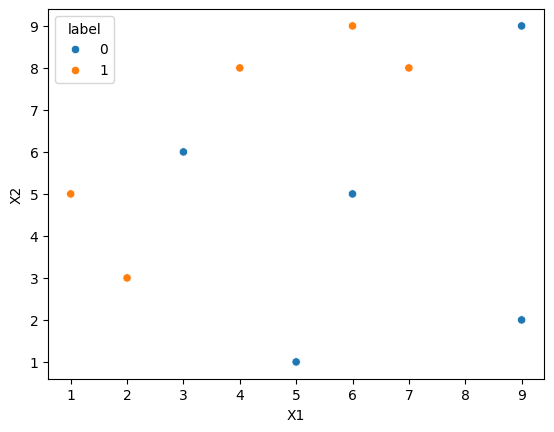

In [40]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [41]:
df['weights'] = 1/df.shape[0]

In [42]:
z = 1
a = 10
zz = z/a
print(zz)

0.1


In [43]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [46]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [47]:
# Step 2 - Train 1st model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

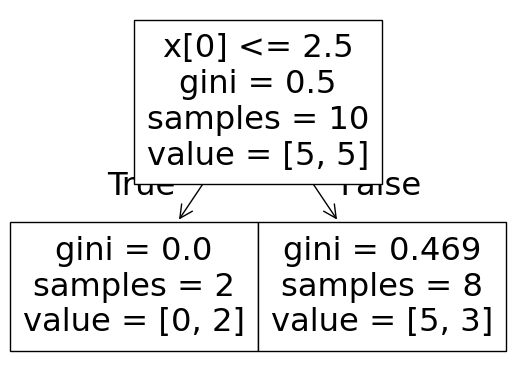

In [48]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

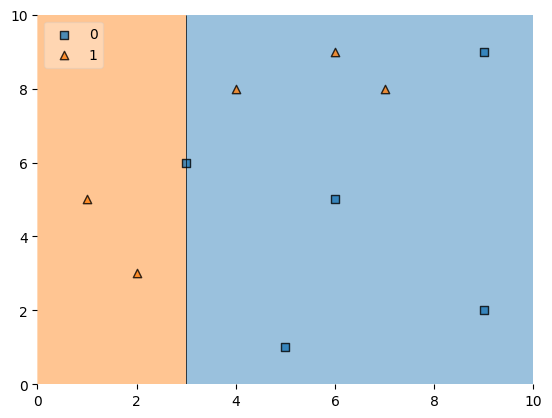

In [49]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [50]:
df['y_pred'] = dt1.predict(X)

In [51]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [52]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))

In [53]:
# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [54]:
# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [55]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [56]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [337]:
df['updated_weights'].sum()

0.9165153319682015

In [338]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [339]:
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [340]:
df['nomalized_weights'].sum()

1.0

In [341]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

In [342]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

In [343]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [344]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [345]:
index_values = create_new_dataset(df)

index_values

[4, 2, 0, 8, 3, 9, 6, 8, 4, 0]

In [346]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [347]:
second_df

,X1,X2,label,weights
4,5,1,0,0.1
2,3,6,0,0.1
0,1,5,1,0.1
8,9,9,0,0.1
3,4,8,1,0.1
9,9,2,0,0.1
6,6,5,0,0.1
8,9,9,0,0.1
4,5,1,0,0.1
0,1,5,1,0.1


In [348]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [349]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [350]:
dt2.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
plot_tree(dt2)

NameError: name 'plot_tree' is not defined

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


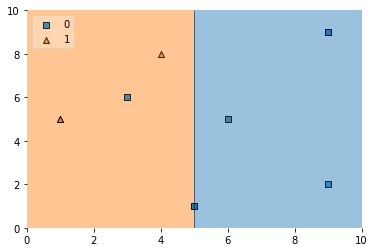

In [352]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [353]:
second_df['y_pred'] = dt2.predict(X)

In [354]:
second_df

,X1,X2,label,weights,y_pred
4,5,1,0,0.1,0
2,3,6,0,0.1,1
0,1,5,1,0.1,1
8,9,9,0,0.1,0
3,4,8,1,0.1,1
9,9,2,0,0.1,0
6,6,5,0,0.1,0
8,9,9,0,0.1,0
4,5,1,0,0.1,0
0,1,5,1,0.1,1


In [355]:
alpha2 = calculate_model_weight(0.1)

In [356]:
alpha2

1.0986122886681098

In [357]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [358]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [359]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
4,5,1,0,0.1,0,0.033622
2,3,6,0,0.1,1,0.297427
0,1,5,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622
9,9,2,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
8,9,9,0,0.1,0,0.033622
4,5,1,0,0.1,0,0.033622
0,1,5,1,0.1,1,0.033622


In [360]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [361]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
4,5,1,0,0.1,0,0.033622,0.056034
2,3,6,0,0.1,1,0.297427,0.495694
0,1,5,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
9,9,2,0,0.1,0,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
4,5,1,0,0.1,0,0.033622,0.056034
0,1,5,1,0.1,1,0.033622,0.056034


In [362]:
second_df['nomalized_weights'].sum()

0.9999999999999999

In [363]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [364]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [365]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
4,5,1,0,0.1,0,0.056034,0.000000,0.056034
2,3,6,0,0.1,1,0.495694,0.056034,0.551728
0,1,5,1,0.1,1,0.056034,0.551728,0.607762
8,9,9,0,0.1,0,0.056034,0.607762,0.663796
3,4,8,1,0.1,1,0.056034,0.663796,0.719830
9,9,2,0,0.1,0,0.056034,0.719830,0.775864
6,6,5,0,0.1,0,0.056034,0.775864,0.831898
8,9,9,0,0.1,0,0.056034,0.831898,0.887932
4,5,1,0,0.1,0,0.056034,0.887932,0.943966
0,1,5,1,0.1,1,0.056034,0.943966,1.000000


In [366]:
index_values = create_new_dataset(second_df)

In [367]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [368]:
third_df

,X1,X2,label,weights
3,4,8,1,0.1
0,1,5,1,0.1
6,6,5,0,0.1
0,1,5,1,0.1
0,1,5,1,0.1
3,4,8,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1
0,1,5,1,0.1


In [369]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


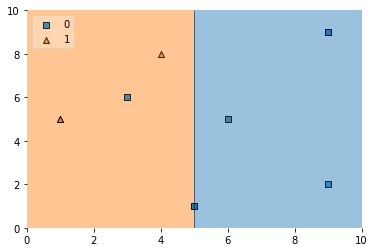

In [370]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [371]:
third_df['y_pred'] = dt3.predict(X)

In [372]:
third_df

,X1,X2,label,weights,y_pred
3,4,8,1,0.1,0
0,1,5,1,0.1,1
6,6,5,0,0.1,1
0,1,5,1,0.1,0
0,1,5,1,0.1,1
3,4,8,1,0.1,0
0,1,5,1,0.1,0
0,1,5,1,0.1,0
0,1,5,1,0.1,0
0,1,5,1,0.1,1


In [373]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

In [374]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


### Prediction

In [375]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [376]:
dt2.predict(query)

array([1])

In [377]:
dt3.predict(query)

array([1])

In [378]:
alpha1*1 + alpha2*(1) + alpha3*(1)

1.09861228866811

In [379]:
np.sign(1.09)

1.0

In [380]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1])

In [381]:
dt2.predict(query)

array([0])

In [382]:
dt3.predict(query)

array([0])

In [383]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

-0.2513144282809062

In [384]:
np.sign(-0.25)

-1.0